<a href="https://colab.research.google.com/github/Stefano0210/IULM_DDM2324_Notebooks/blob/main/24_Churn_Analysis_TELCO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisi del Customer Churn (Telco)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


!wget "https://github.com/Stefano0210/IULM_DDM2324_Notebooks/raw/main/data/Telco_customer_churn.xlsx"
# Ricaricare il dataset
file_path = 'Telco_customer_churn.xlsx'
churn_data = pd.read_excel(file_path)

# Preparare i dati per le analisi
# Convertire la colonna 'Churn Label' in formato numerico per facilitare l'analisi
churn_data['Churn Numeric'] = churn_data['Churn Label'].apply(lambda x: 1 if x == 'Yes' else 0)
#churn_data['Gender'] = churn_data['Gender'].apply(lambda x: 1 if x == 'Female' else 0)



--2024-04-09 15:00:56--  https://github.com/Stefano0210/IULM_DDM2324_Notebooks/raw/main/data/Telco_customer_churn.xlsx
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Stefano0210/IULM_DDM2324_Notebooks/main/data/Telco_customer_churn.xlsx [following]
--2024-04-09 15:00:57--  https://raw.githubusercontent.com/Stefano0210/IULM_DDM2324_Notebooks/main/data/Telco_customer_churn.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1368250 (1.3M) [application/octet-stream]
Saving to: ‘Telco_customer_churn.xlsx’

Telco_customer_chur 100%[===================>]   1.30M  --.-KB/s    in 0.05s   

2024-04-09 

# Proporzione di churn

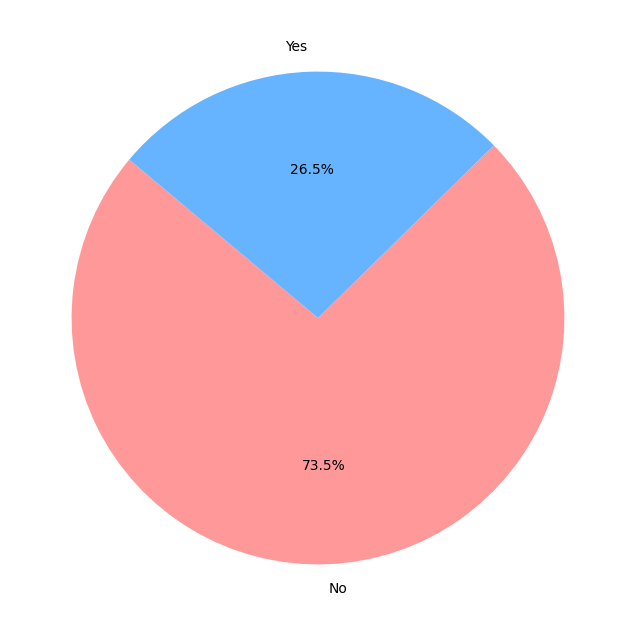

In [2]:
# Calcolo delle proporzioni di churn e non churn
churn_proportions = churn_data['Churn Label'].value_counts(normalize=True)

# Creazione del grafico a torta
plt.figure(figsize=(8, 8))
plt.pie(churn_proportions, labels=churn_proportions.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.show()



# Distribuzione delle variabili numeriche

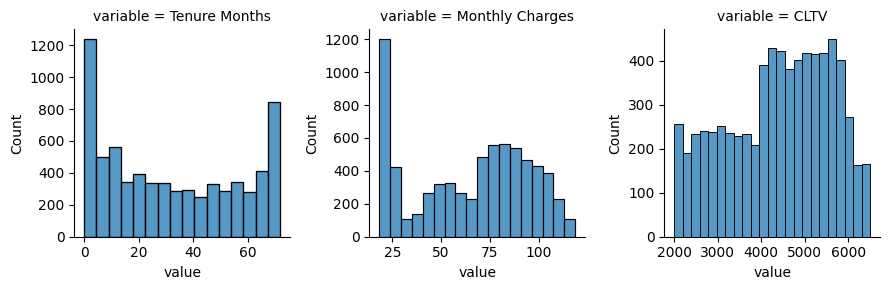

In [3]:
# Identificazione delle variabili numeriche continue nel dataset
continuous_vars = ['Tenure Months',
       'Monthly Charges', 'CLTV']

# Preparazione dei dati per sns.FacetGrid
melted_data = pd.melt(churn_data, value_vars=continuous_vars)

# Creazione dei grafici
facet_grid = sns.FacetGrid(melted_data, col='variable', col_wrap=3, sharex=False, sharey=False)
facet_grid = facet_grid.map(sns.histplot, 'value')


plt.show()



In [4]:
continuous_vars

['Tenure Months', 'Monthly Charges', 'CLTV']

# Analisi delle variabili categoriche

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


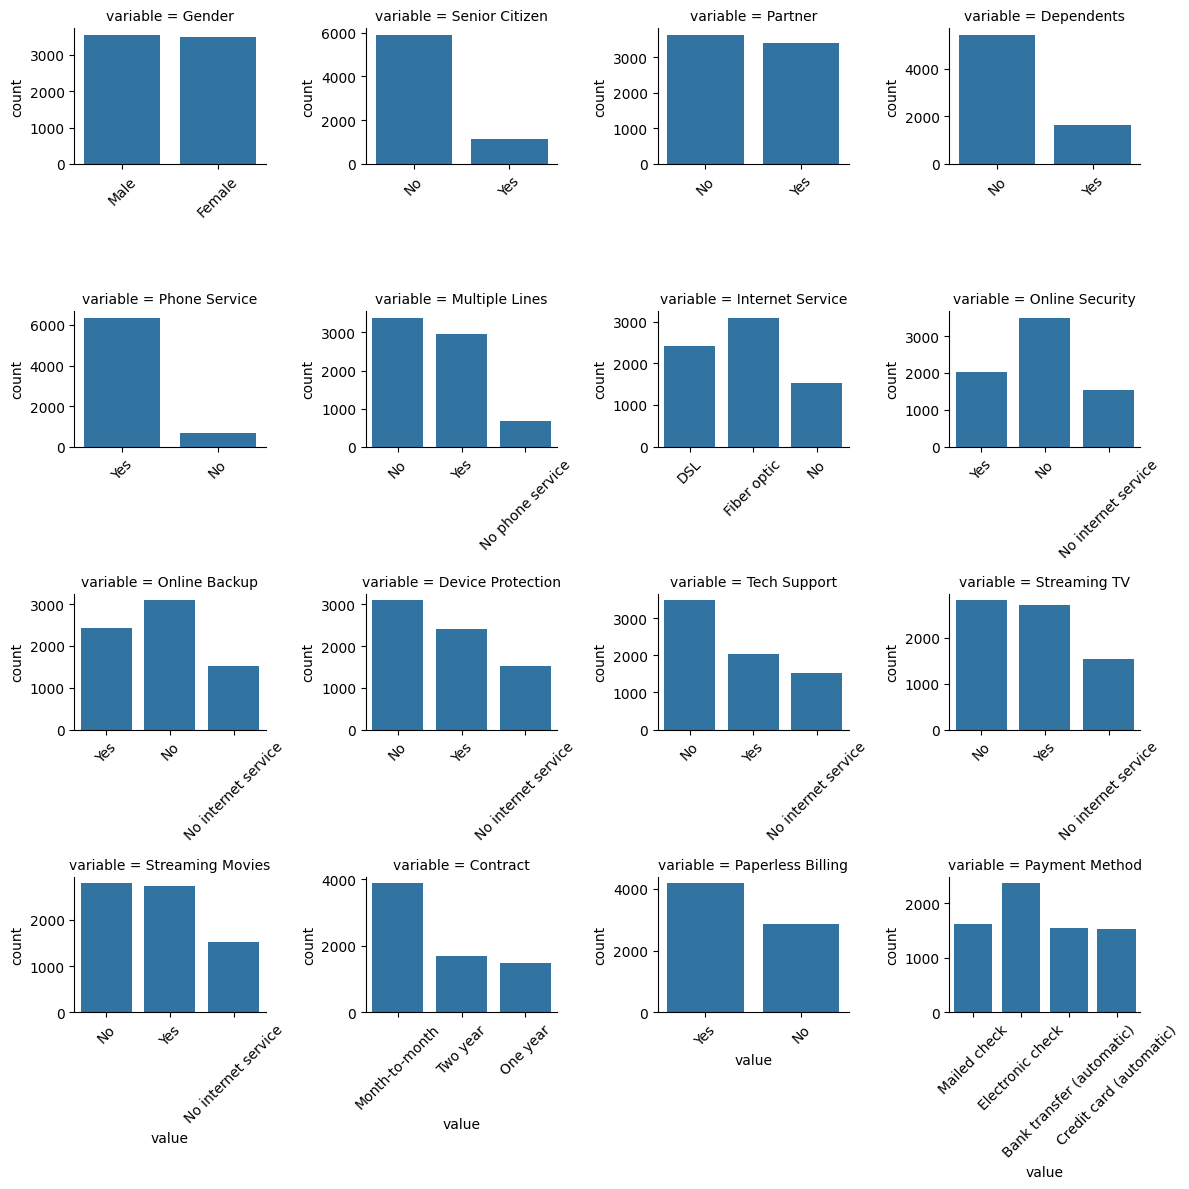

In [5]:
categorical_vars = ['Gender',
       'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method']

# Preparazione dei dati per sns.FacetGrid
melted_data_categorical = pd.melt(churn_data, value_vars=categorical_vars)
# Creazione dei grafici per le variabili categoriche
facet_grid_categorical = sns.FacetGrid(melted_data_categorical, col='variable', col_wrap=4, sharex=False, sharey=False)
facet_grid_categorical = facet_grid_categorical.map(sns.countplot, 'value')

# Ajusting for better visualization
for ax in facet_grid_categorical.axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.tight_layout()
plt.show()



# EDA: come le variabili impattano il churn

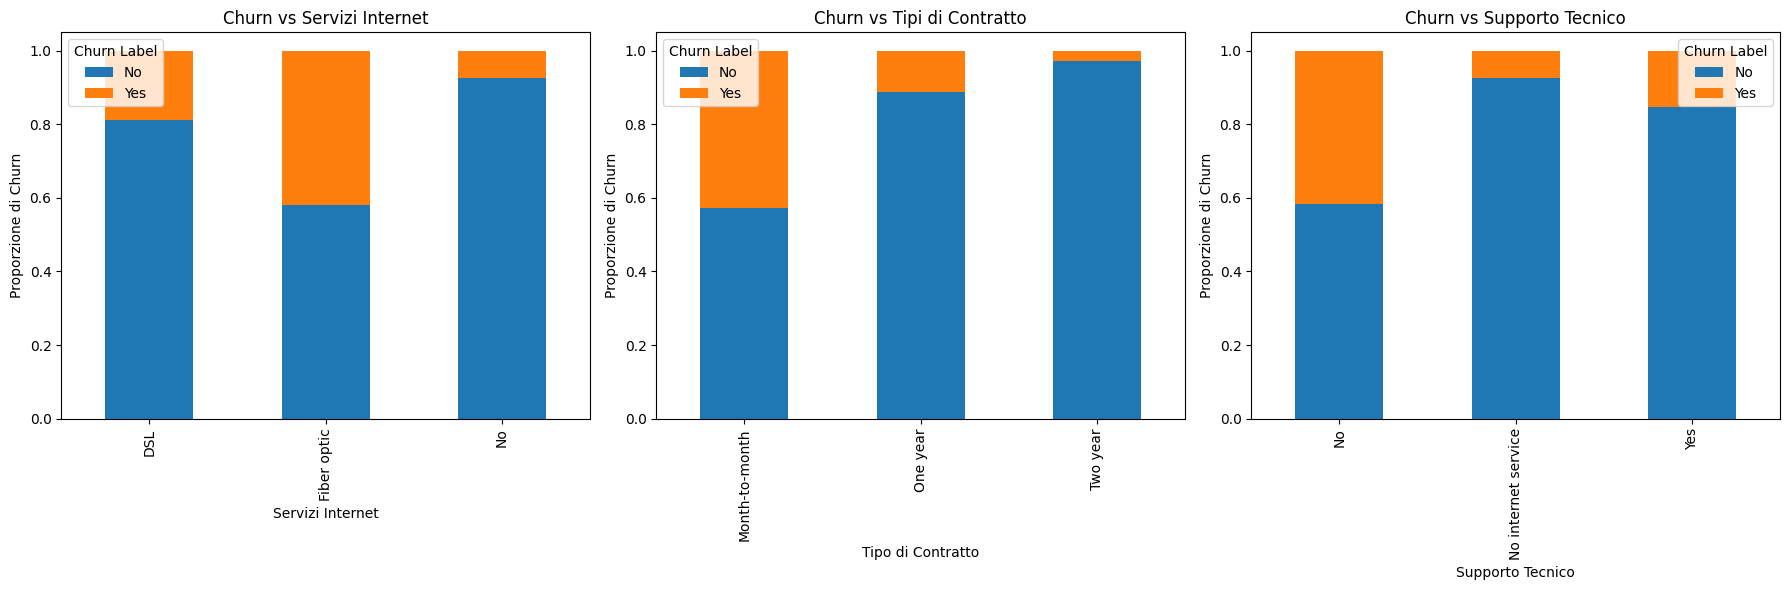

In [6]:
# Calcolo delle proporzioni corrette per ogni categoria nelle variabili analizzate

# Funzione per calcolare le proporzioni di churn
def calculate_churn_proportions(df, column_name):
    churn_counts = df.groupby([column_name, 'Churn Label']).size().unstack()
    churn_proportions = churn_counts.div(churn_counts.sum(axis=1), axis=0)
    return churn_proportions

# Calcolare le proporzioni per le variabili selezionate
prop_internet_service = calculate_churn_proportions(churn_data, 'Internet Service')
prop_contract = calculate_churn_proportions(churn_data, 'Contract')
prop_tech_support = calculate_churn_proportions(churn_data, 'Tech Support')

# Grafici delle proporzioni
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Churn vs Servizi Internet
prop_internet_service.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Churn vs Servizi Internet')
axes[0].set_ylabel('Proporzione di Churn')
axes[0].set_xlabel('Servizi Internet')

# Churn vs Tipi di Contratto
prop_contract.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Churn vs Tipi di Contratto')
axes[1].set_ylabel('Proporzione di Churn')
axes[1].set_xlabel('Tipo di Contratto')

# Churn vs Supporto Tecnico
prop_tech_support.plot(kind='bar', stacked=True, ax=axes[2])
axes[2].set_title('Churn vs Supporto Tecnico')
axes[2].set_ylabel('Proporzione di Churn')
axes[2].set_xlabel('Supporto Tecnico')

plt.tight_layout()
plt.show()



# Distribuzione geografica

Verrá preparato un dataset che poi verrá elaborato in qgis

In [7]:
# Calcolo per ogni zip code il numero totale di clienti, il numero di clienti che hanno fatto churn e la proporzione di churn
churn_by_zip = churn_data.groupby('Zip Code').agg(
    Total_Customers=('CustomerID', 'count'),
    Churned_Customers=('Churn Value', 'sum')
)
churn_by_zip['Churn_Proportion'] = churn_by_zip['Churned_Customers'] / churn_by_zip['Total_Customers']

# Salvare il risultato in un file CSV
output_file_path = 'churn_by_zip_code.xlsx'  # Sostituisci con il percorso desiderato
churn_by_zip.to_excel(output_file_path)

print("File salvato:", output_file_path)

File salvato: churn_by_zip_code.xlsx


Si importa il file dopo il processing eseguito in qgis

In [9]:
!wget "https://github.com/Stefano0210/IULM_DDM2324_Notebooks/raw/main/data/los_angeles_area_zipcodes.csv"
la_area_zipcodes = pd.read_csv('los_angeles_area_zipcodes.csv')
print(la_area_zipcodes.head())

--2024-04-09 15:14:53--  https://github.com/Stefano0210/IULM_DDM2324_Notebooks/raw/main/data/los_angeles_area_zipcodes.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Stefano0210/IULM_DDM2324_Notebooks/main/data/los_angeles_area_zipcodes.csv [following]
--2024-04-09 15:14:53--  https://raw.githubusercontent.com/Stefano0210/IULM_DDM2324_Notebooks/main/data/los_angeles_area_zipcodes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55487 (54K) [text/plain]
Saving to: ‘los_angeles_area_zipcodes.csv’

los_angeles_area_zi 100%[===================>]  54.19K  --.-KB/s    in 0.01s   

2024-04-09 1

# Le ragioni per abbandonare l'azienda

<ipython-input-10-d42668395b57>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=overall_churn_reasons.values, y=overall_churn_reasons.index, palette="vlag")


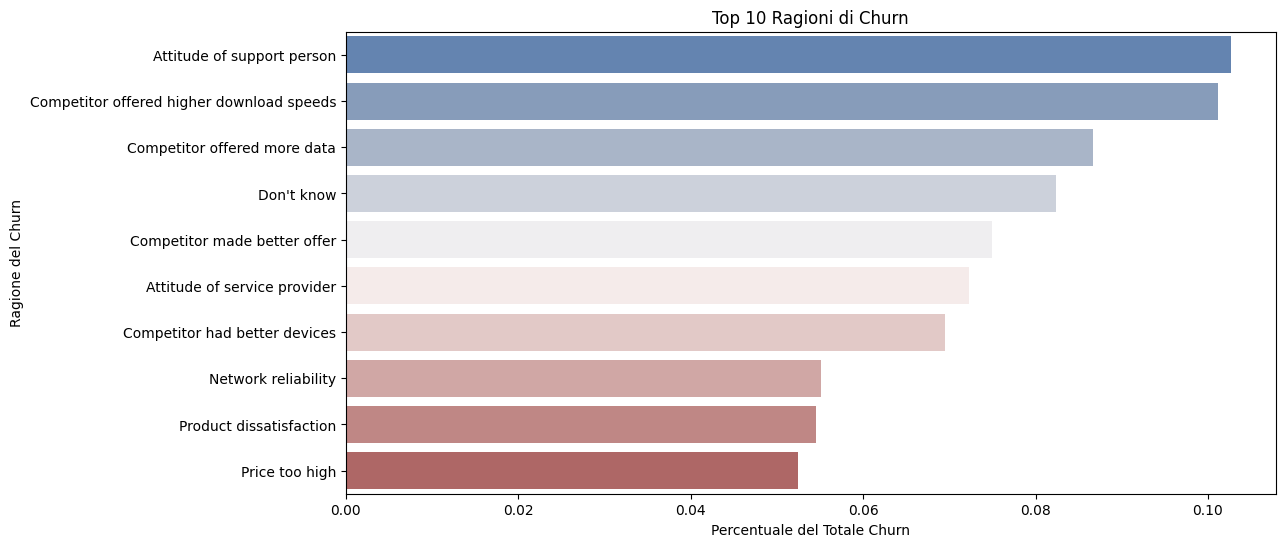

In [10]:
overall_churn_reasons = churn_data['Churn Reason'].value_counts(normalize=True).head(10)  # Top 10 ragioni

# Creare un grafico a barre per visualizzare le ragioni principali del churn
plt.figure(figsize=(12, 6))
sns.barplot(x=overall_churn_reasons.values, y=overall_churn_reasons.index, palette="vlag")
plt.title('Top 10 Ragioni di Churn')
plt.xlabel('Percentuale del Totale Churn')
plt.ylabel('Ragione del Churn')
plt.show()

# Le ragioni per abbandonare l'azienda specifiche nell'area di LA

<ipython-input-11-6c960142c72d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=overall_churn_reasons.values, y=overall_churn_reasons.index, palette="vlag")


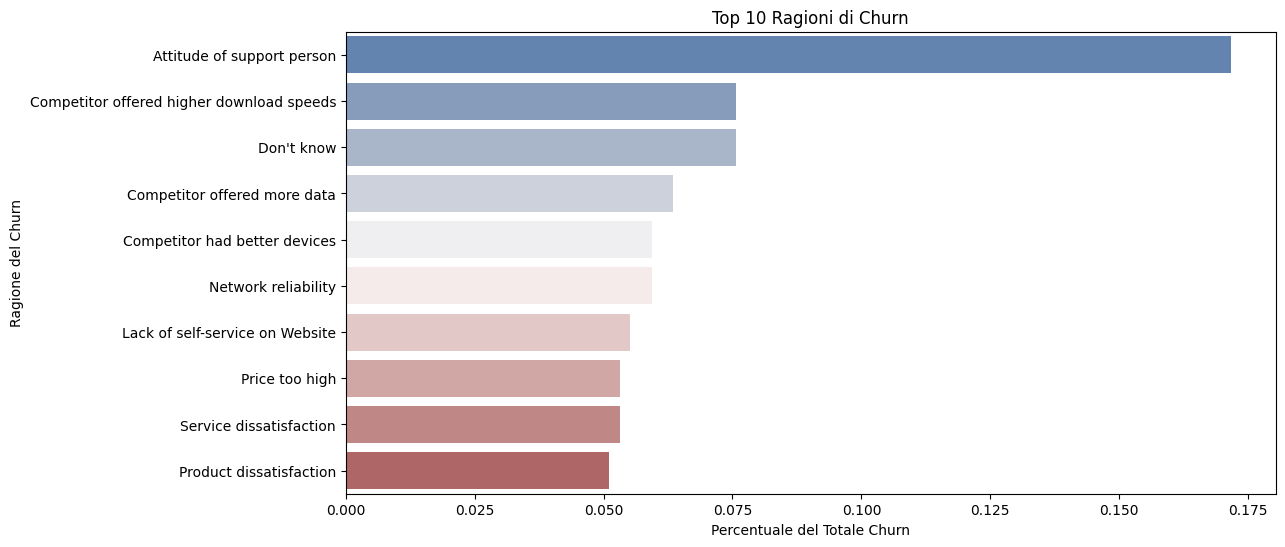

In [11]:

la_churn_data = churn_data[churn_data['Zip Code'].isin(la_area_zipcodes['ZIP_CODE'])]

overall_churn_reasons = la_churn_data['Churn Reason'].value_counts(normalize=True).head(10)  # Top 10 ragioni

# Creare un grafico a barre per visualizzare le ragioni principali del churn
plt.figure(figsize=(12, 6))
sns.barplot(x=overall_churn_reasons.values, y=overall_churn_reasons.index, palette="vlag")
plt.title('Top 10 Ragioni di Churn')
plt.xlabel('Percentuale del Totale Churn')
plt.ylabel('Ragione del Churn')
plt.show()

# Valori mancanti

In [12]:
churn_data.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
Churn Numeric           0
dtype: int64

# Encoding delle Variabili Categoriche

In [13]:
binary_vars = ['Gender','Senior Citizen', 'Partner', 'Dependents', 'Paperless Billing']
categorical_vars = ['Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract',  'Payment Method']
numerical_vars =['Tenure Months',
       'Monthly Charges', 'CLTV',
       'Churn Numeric']
selected_vars =  binary_vars + categorical_vars + numerical_vars
selected_vars

['Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Paperless Billing',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Payment Method',
 'Tenure Months',
 'Monthly Charges',
 'CLTV',
 'Churn Numeric']

In [14]:
data = churn_data[selected_vars]
data.head()

,Gender,Senior Citizen,Partner,Dependents,Paperless Billing,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Payment Method,Tenure Months,Monthly Charges,CLTV,Churn Numeric
0,Male,No,No,No,Yes,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Mailed check,2,53.85,3239,1
1,Female,No,No,Yes,Yes,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check,2,70.70,2701,1
2,Female,No,No,Yes,Yes,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Electronic check,8,99.65,5372,1
3,Female,No,Yes,Yes,Yes,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Electronic check,28,104.80,5003,1
4,Male,No,No,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Bank transfer (automatic),49,103.70,5340,1


In [15]:
from sklearn.preprocessing import LabelEncoder

binary_data = data[binary_vars].copy()

# Assuming 'binary_vars' is a list of binary variable column names
for col in binary_vars:
    print(col)
    encoder = LabelEncoder()
    binary_data[col] = encoder.fit_transform(binary_data[col].astype(str))


from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse = False)

# Apply OneHotEncoder to categorical variables
encoded_categorical_data = encoder.fit_transform(data[categorical_vars])

# Creating column names for the encoded data
columns = []
for i, col in enumerate(categorical_vars):
    print(col)
    labels = [f"{col}_{label}" for label in encoder.categories_[i]]
    columns.extend(labels)

# Create a DataFrame with the encoded data
encoded_categorical_df = pd.DataFrame(encoded_categorical_data, columns=columns)

## -----

data_dropped = data.drop(binary_vars + categorical_vars, axis=1)

# Concatenate the encoded categorical data with the rest of the DataFrame
encoded_data = pd.concat([data_dropped, binary_data, encoded_categorical_df], axis=1)

print(encoded_data)


Gender
Senior Citizen
Partner
Dependents
Paperless Billing
Phone Service
Multiple Lines
Internet Service
Online Security
Online Backup
Device Protection
Tech Support
Streaming TV
Streaming Movies
Contract
Payment Method
      Tenure Months  Monthly Charges  CLTV  Churn Numeric  Gender  \
0                 2            53.85  3239              1       1   
1                 2            70.70  2701              1       0   
2                 8            99.65  5372              1       0   
3                28           104.80  5003              1       0   
4                49           103.70  5340              1       1   
...             ...              ...   ...            ...     ...   
7038             72            21.15  5306              0       0   
7039             24            84.80  2140              0       1   
7040             72           103.20  5560              0       0   
7041             11            29.60  2793              0       0   
7042             66  

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [16]:
target = encoded_data['Churn Numeric']
all_columns = list(encoded_data.columns)
all_columns.remove('Churn Numeric')

# Selezione delle variabili con RFE

In [17]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X = encoded_data[all_columns] # Features
y = encoded_data['Churn Numeric'] # Target variable

# Feature extraction
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=8)
fit = rfe.fit(X, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 8
Selected Features: [False False False False False False  True False False False False False
 False False  True False  True False False  True False False False False
 False  True False False False False False False False False  True False
  True False False  True False]
Feature Ranking: [27 33 34 28 26 24  1  4 31  2 18 29 17  3  1 13  1 10  8  1 15 14 32 22
 30  1  9 11 23 20  7 25 21 12  1 16  1  6  5  1 19]


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

selected_features_rfe = list(fit.support_)

final_features_rfe = []
for status, var in zip(selected_features_rfe, all_columns):
    if status == True:
        final_features_rfe.append(var)

final_features_rfe

['Dependents',
 'Internet Service_Fiber optic',
 'Online Security_No',
 'Online Backup_No',
 'Tech Support_No',
 'Contract_Month-to-month',
 'Contract_Two year',
 'Payment Method_Electronic check']

# Regressione Logistica su dataset RFE

Si inizia definendo due funzioni di utilitá

In [19]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

def calcolo_regressione_logistica(X,y):
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

  lr_model = LogisticRegression()

  # fit the model with data
  lr_model.fit(X_train,y_train)
  y_pred=lr_model.predict(X_test)

  y_pred_proba = lr_model.predict_proba(X_test)[::,1]

  return lr_model,y_test,y_pred, y_pred_proba

def calcolo_metriche_regressione(y_test, y_pred):

  # Calcolo della matrice di confusione
  conf_matrix = confusion_matrix(y_test, y_pred)

  # Calcolo di precisione e richiamo
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1score = f1_score(y_test, y_pred)
  accuracy = accuracy_score(y_test, y_pred)

  return conf_matrix, precision, recall, f1score, accuracy

Regressione logistica su tutte le variabili

In [20]:
X = encoded_data[all_columns]
y = encoded_data['Churn Numeric']

lr_model,y_test,y_pred, _ = calcolo_regressione_logistica(X, y)

conf_matrix, precision, recall, f1score, accuracy = calcolo_metriche_regressione(y_test,y_pred)

print("Accuracy: ",accuracy)

Accuracy:  0.8086314593980692


Calcolo su variabili RFE

In [21]:
X = encoded_data[final_features_rfe]
y = encoded_data['Churn Numeric']


lr_model,y_test,y_pred, _ = calcolo_regressione_logistica(X, y)

conf_matrix, precision, recall, f1score, accuracy = calcolo_metriche_regressione(y_test,y_pred)

print("Accuracy: ",accuracy)

Accuracy:  0.7910278250993753


# Precision, recall e matrice di confusione

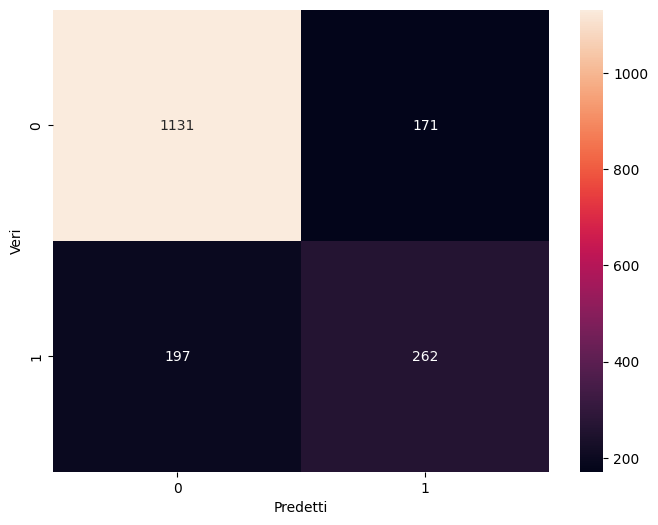

Precisione: 0.605080831408776
Richiamo: 0.5708061002178649
F1 Score: 0.5874439461883408
accuracy: 0.7910278250993753


In [22]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score


# Visualizzazione della matrice di confusione
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predetti')
plt.ylabel('Veri')
plt.show()

# Stampa di precisione e richiamo
print(f'Precisione: {precision}')
print(f'Richiamo: {recall}')
print(f'F1 Score: {f1score}')
print(f'accuracy: {accuracy}')

# Applicazione di SMOTE

In [23]:
from imblearn.over_sampling import SMOTE
import pandas as pd
import statsmodels.api as sm

X = encoded_data[all_columns]
y = encoded_data['Churn Numeric']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)
new_class_distribution = y_res.value_counts()
new_class_distribution_percentage = y_res.value_counts(normalize=True) * 100
new_class_distribution, new_class_distribution_percentage

(Churn Numeric
 1    5174
 0    5174
 Name: count, dtype: int64,
 Churn Numeric
 1    50.0
 0    50.0
 Name: proportion, dtype: float64)

In [24]:
lr_model,y_test,y_pred, y_pred_proba = calcolo_regressione_logistica(X_res, y_res)

conf_matrix, precision, recall, f1score, accuracy = calcolo_metriche_regressione(y_test,y_pred)

print(f'Precisione: {precision}')
print(f'Richiamo: {recall}')
print(f'F1 Score: {f1score}')
print(f'accuracy: {accuracy}')

Precisione: 0.7780203784570596
Richiamo: 0.8098484848484848
F1 Score: 0.7936154417223459
accuracy: 0.7850792423656745


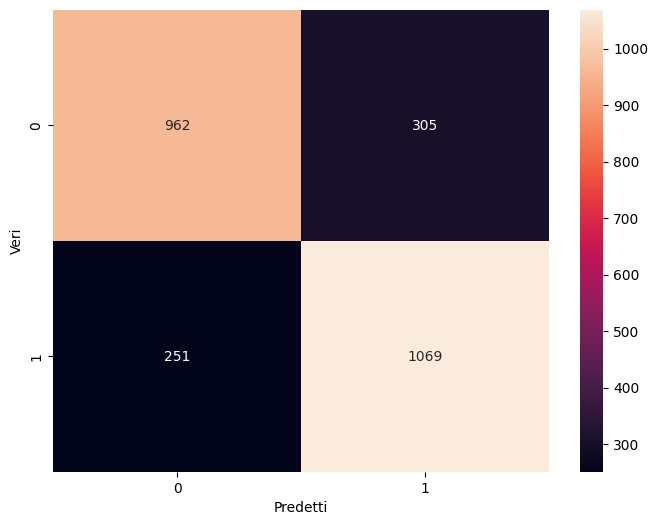

In [25]:
# Visualizzazione della matrice di confusione
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predetti')
plt.ylabel('Veri')
plt.show()


# AUC

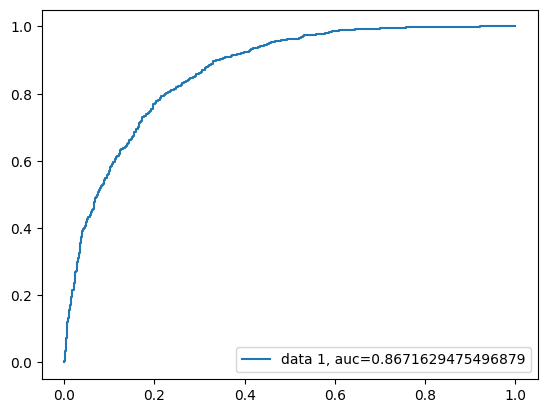

In [26]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [27]:
import numpy as np
# Calcolo di FPR, TPR e soglie
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)

# Calcolo della distanza di ogni punto della curva ROC da (0,1)
distances = np.sqrt((1 - tpr) ** 2 + fpr ** 2)

# Trovare la soglia con la minima distanza
optimal_idx = np.argmin(distances)
optimal_threshold = thresholds[optimal_idx]

print(f"La soglia ottimale è: {optimal_threshold}")

La soglia ottimale è: 0.5426712354294726


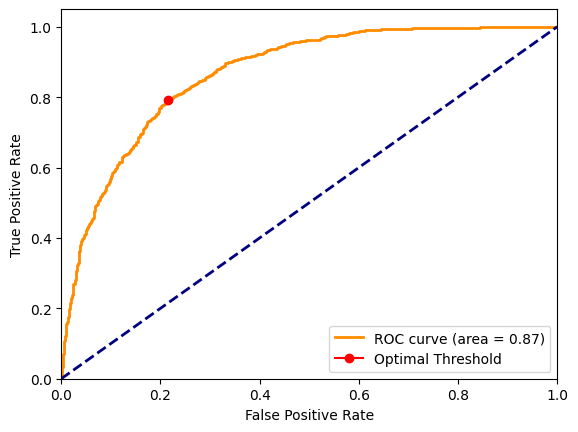

In [28]:

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)
roc_auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Calcolo della distanza di ogni punto della curva ROC da (0,1) e trovare la soglia ottimale
distances = np.sqrt((1 - tpr) ** 2 + fpr ** 2)
optimal_idx = np.argmin(distances)
optimal_threshold = thresholds[optimal_idx]

# Creare il grafico ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Aggiungere un punto per la soglia ottimale
plt.plot(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='red', label='Optimal Threshold')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()